In [17]:
from google.colab import files
uploaded = files.upload()


Saving GCB2022v27_percapita_flat.csv to GCB2022v27_percapita_flat.csv


Mean Absolute Error: 0.0176 metric tons per capita
R2 Score: 1.0000


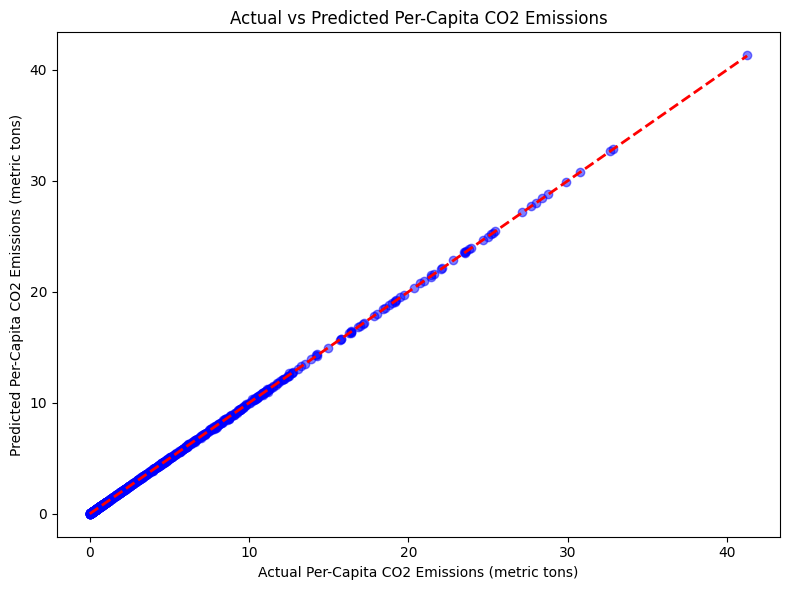


Feature Importance:
   Feature  Coefficient
3   Cement     1.062397
0     Coal     1.013057
1      Oil     1.000548
2      Gas     0.999785
4  Flaring     0.999475


In [21]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and preprocess data
# Load the CSV
df = pd.read_csv('/content/GCB2022v27_percapita_flat.csv')

# Filter for years 2002–2022
df = df[df['Year'] >= 2002]

# Select features and target
features = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring']
target = 'Total'

# Drop rows with missing 'Total' or features
df = df.dropna(subset=[target] + features)

# Drop 'Other' column due to many missing values
df = df.drop(columns=['Other'], errors='ignore')

# Replace non-numeric values (if any) with NaN and drop them
df[features + [target]] = df[features + [target]].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=features + [target])

# Prepare X (features) and y (target)
X = df[features]
y = df[target]

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.4f} metric tons per capita')
print(f'R2 Score: {r2:.4f}')

# Step 5: Visualize results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Per-Capita CO2 Emissions (metric tons)')
plt.ylabel('Predicted Per-Capita CO2 Emissions (metric tons)')
plt.title('Actual vs Predicted Per-Capita CO2 Emissions')
plt.tight_layout()
plt.show()

# Step 6: Feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', ascending=False))

In [22]:
import pandas as pd

# Load the CSV
df = pd.read_csv('/content/GCB2022v27_percapita_flat.csv')

# Filter for years 2002–2022
recent_df = df[df['Year'] >= 2002]

# Show the first 5 rows
print(recent_df.head())

# Show unique values in 'Total'
print(recent_df['Total'].unique())

# Show data types and non-null counts
print(recent_df.info())

         Country ISO 3166-1 alpha-3  Year     Total      Coal       Oil  \
252  Afghanistan                AFG  2002  0.063856  0.002624  0.034639   
253  Afghanistan                AFG  2003  0.068871  0.004054  0.043788   
254  Afghanistan                AFG  2004  0.052529  0.003889  0.038579   
255  Afghanistan                AFG  2005  0.077403  0.004353  0.059288   
256  Afghanistan                AFG  2006  0.084869  0.006326  0.065126   

          Gas    Cement  Flaring  Other  
252  0.026067  0.000525      0.0    NaN  
253  0.020596  0.000433      0.0    NaN  
254  0.009645  0.000416      0.0    NaN  
255  0.013509  0.000254      0.0    NaN  
256  0.012939  0.000479      0.0    NaN  
[0.063856 0.068871 0.052529 ... 4.775633 4.497423 4.693699]
<class 'pandas.core.frame.DataFrame'>
Index: 4640 entries, 252 to 63103
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4640 non-